In [18]:
# Import dependencies 
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np
from citipy import citipy 
import requests
from config import weather_api_key
import time 
from datetime import datetime
import time 

In [9]:
# create our base URL 
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [10]:
# Create a set of random lat and long combinations 
lats = np.random.uniform(low=-90.000, high=90.000, size=1500) 
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [11]:
# att the lats/longs to a list 
coordinates = list(lat_lngs)

In [12]:
# create a list for holding the cities 
cities = []
# identify the nearest cities to the coordinates 
for coordinate in coordinates: 
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    # if the city is unique then add it to the list 
    if city not in cities: 
        cities.append(city) 
# print the city count to confirm 
len(cities)

615

In [13]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | qaanaaq
Processing Record 2 of Set 1 | tasiilaq
Processing Record 3 of Set 1 | san ramon
Processing Record 4 of Set 1 | tingo maria
Processing Record 5 of Set 1 | funadhoo
Processing Record 6 of Set 1 | bull savanna
Processing Record 7 of Set 1 | los llanos de aridane
Processing Record 8 of Set 1 | uribia
Processing Record 9 of Set 1 | pasni
Processing Record 10 of Set 1 | newport
Processing Record 11 of Set 1 | bluff
Processing Record 12 of Set 1 | hermosillo
Processing Record 13 of Set 1 | vaitupu
City not found. Skipping...
Processing Record 14 of Set 1 | tutoia
Processing Record 15 of Set 1 | khatanga
Processing Record 16 of Set 1 | yulara
Processing Record 17 of Set 1 | mount isa
Processing Record 18 of Set 1 | punta arenas
Processing Record 19 of Set 1 | busselton
Processing Record 20 of Set 1 | richards bay
Processing Record 21 of Set 1 | ribeira grande
Processing Record 22 of Set 1 | riki

Processing Record 38 of Set 4 | lianzhou
Processing Record 39 of Set 4 | husavik
Processing Record 40 of Set 4 | nabire
Processing Record 41 of Set 4 | dvinskoy
Processing Record 42 of Set 4 | nalut
Processing Record 43 of Set 4 | mundo nuevo
Processing Record 44 of Set 4 | goure
Processing Record 45 of Set 4 | norman wells
Processing Record 46 of Set 4 | eusebio
Processing Record 47 of Set 4 | axim
Processing Record 48 of Set 4 | coquimbo
Processing Record 49 of Set 4 | jibuti
Processing Record 50 of Set 4 | lebu
Processing Record 1 of Set 5 | nizhneyansk
City not found. Skipping...
Processing Record 2 of Set 5 | roald
Processing Record 3 of Set 5 | toba
Processing Record 4 of Set 5 | chuy
Processing Record 5 of Set 5 | san cristobal
Processing Record 6 of Set 5 | les cayes
Processing Record 7 of Set 5 | pitimbu
Processing Record 8 of Set 5 | mandera
Processing Record 9 of Set 5 | po
City not found. Skipping...
Processing Record 10 of Set 5 | norfolk
Processing Record 11 of Set 5 | bi

Processing Record 27 of Set 8 | meyungs
City not found. Skipping...
Processing Record 28 of Set 8 | santo tomas
Processing Record 29 of Set 8 | nhulunbuy
Processing Record 30 of Set 8 | asau
Processing Record 31 of Set 8 | fort nelson
Processing Record 32 of Set 8 | port keats
Processing Record 33 of Set 8 | dingle
Processing Record 34 of Set 8 | teahupoo
Processing Record 35 of Set 8 | harper
Processing Record 36 of Set 8 | sola
Processing Record 37 of Set 8 | paamiut
Processing Record 38 of Set 8 | linhares
Processing Record 39 of Set 8 | uwayl
City not found. Skipping...
Processing Record 40 of Set 8 | tautira
Processing Record 41 of Set 8 | talakan
Processing Record 42 of Set 8 | chimbote
Processing Record 43 of Set 8 | constitucion
Processing Record 44 of Set 8 | te anau
Processing Record 45 of Set 8 | biloela
Processing Record 46 of Set 8 | faanui
Processing Record 47 of Set 8 | muriwai beach
Processing Record 48 of Set 8 | torbay
Processing Record 49 of Set 8 | bequimao
Processi

Processing Record 17 of Set 12 | matay
Processing Record 18 of Set 12 | ajaccio
Processing Record 19 of Set 12 | lethem
Processing Record 20 of Set 12 | cocobeach
Processing Record 21 of Set 12 | flin flon
Processing Record 22 of Set 12 | albanel
Processing Record 23 of Set 12 | vaovai
City not found. Skipping...
Processing Record 24 of Set 12 | basay
Processing Record 25 of Set 12 | san clemente
Processing Record 26 of Set 12 | kruisfontein
Processing Record 27 of Set 12 | marsa matruh
Processing Record 28 of Set 12 | angoche
Processing Record 29 of Set 12 | pangody
Processing Record 30 of Set 12 | egvekinot
Processing Record 31 of Set 12 | olafsvik
Processing Record 32 of Set 12 | zhuhai
Processing Record 33 of Set 12 | kamenskoye
City not found. Skipping...
Processing Record 34 of Set 12 | magdagachi
Processing Record 35 of Set 12 | teluknaga
Processing Record 36 of Set 12 | mirnyy
Processing Record 37 of Set 12 | bubaque
Processing Record 38 of Set 12 | pisco
Processing Record 39 o

In [14]:
# convert the array of dictionaries to a Pandas DF 
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Qaanaaq,77.4840,-69.3632,-8.14,58,76,9.26,GL,2022-01-29 16:24:40
1,Tasiilaq,65.6145,-37.6368,14.16,71,65,4.65,GL,2022-01-29 16:24:40
2,San Ramon,37.7799,-121.9780,52.38,80,0,0.00,US,2022-01-29 16:21:06
3,Tingo Maria,-9.2895,-76.0088,79.11,78,75,3.44,PE,2022-01-29 16:24:41
4,Funadhoo,6.1500,73.2667,81.23,77,62,14.90,MV,2022-01-29 16:24:41
5,Bull Savanna,17.8868,-77.5902,80.46,57,12,4.14,JM,2022-01-29 16:24:41
6,Los Llanos De Aridane,28.6585,-17.9182,64.15,71,20,5.01,ES,2022-01-29 16:24:42
7,Uribia,11.7139,-72.2660,85.35,52,93,5.75,CO,2022-01-29 16:24:42
8,Pasni,25.2631,63.4710,71.53,77,0,13.35,PK,2022-01-29 16:24:43
9,Newport,51.5877,-2.9984,53.26,79,71,3.00,GB,2022-01-29 16:24:43


In [15]:
new_column_order = ['City','Country','Date','Lat','Lng','Max Temp','Humidity','Cloudiness','Wind Speed']
city_data_df = city_data_df[new_column_order]
city_data_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Qaanaaq,GL,2022-01-29 16:24:40,77.4840,-69.3632,-8.14,58,76,9.26
1,Tasiilaq,GL,2022-01-29 16:24:40,65.6145,-37.6368,14.16,71,65,4.65
2,San Ramon,US,2022-01-29 16:21:06,37.7799,-121.9780,52.38,80,0,0.00
3,Tingo Maria,PE,2022-01-29 16:24:41,-9.2895,-76.0088,79.11,78,75,3.44
4,Funadhoo,MV,2022-01-29 16:24:41,6.1500,73.2667,81.23,77,62,14.90


In [16]:
# create output CSV 
output_data_file = 'weather_data/cities.csv'

# export CSV 
city_data_df.to_csv(output_data_file, index_label='City_ID')

In [17]:
# Extract relevant fields from the DF for plotting 
lats = city_data_df['Lat']
max_temps = city_data_df['Max Temp']
humidity = city_data_df['Humidity']
cloudiness = city_data_df['Cloudiness']
wind_speed = city_data_df['Wind Speed']

In [24]:
# Get the date in seconds 
today = time.time()
today

1643474873.8936698

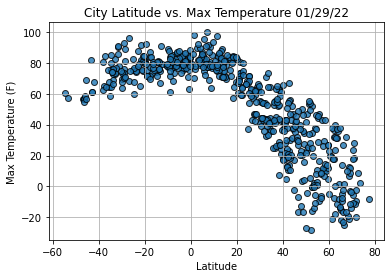

In [28]:
# build the scatter plot for lat vs max temp 
plt.scatter(lats,
           max_temps,
           edgecolor='black', linewidths=1, marker='o',
           alpha=0.8, label='Cities')

# Incorporate the other graph properties 
plt.title(f'City Latitude vs. Max Temperature ' + time.strftime('%x'))
plt.ylabel('Max Temperature (F)')
plt.xlabel('Latitude')
plt.grid(True)

#Save the figure 
plt.savefig('weather_data/Fig1.png')

#show plot 
plt.show()

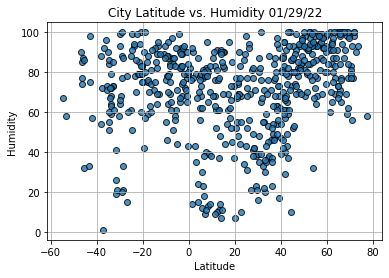

In [29]:
# build the scatter plot for lat vs humidity 
plt.scatter(lats,
           humidity,
           edgecolor='black', linewidths=1, marker='o',
           alpha=0.8, label='Cities')

# Incorporate the other graph properties 
plt.title(f'City Latitude vs. Humidity ' + time.strftime('%x'))
plt.ylabel('Humidity')
plt.xlabel('Latitude')
plt.grid(True)

#Save the figure 
plt.savefig('weather_data/Fig2.png')

#show plot 
plt.show()

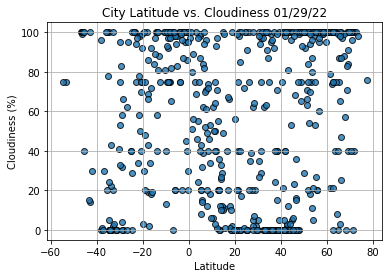

In [30]:
# build the scatter plot cloudiness
plt.scatter(lats,
           cloudiness,
           edgecolor='black', linewidths=1, marker='o',
           alpha=0.8, label='Cities')

# Incorporate the other graph properties 
plt.title(f'City Latitude vs. Cloudiness ' + time.strftime('%x'))
plt.ylabel('Cloudiness (%)')
plt.xlabel('Latitude')
plt.grid(True)

#Save the figure 
plt.savefig('weather_data/Fig3.png')

#show plot 
plt.show()

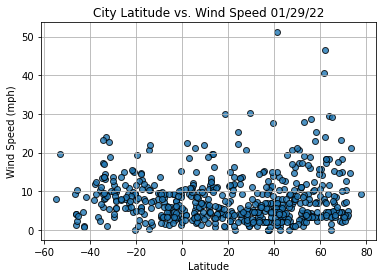

In [31]:
# build the scatter plot for lat vs wind speed 
plt.scatter(lats,
           wind_speed,
           edgecolor='black', linewidths=1, marker='o',
           alpha=0.8, label='Cities')

# Incorporate the other graph properties 
plt.title(f'City Latitude vs. Wind Speed ' + time.strftime('%x'))
plt.ylabel('Wind Speed (mph)')
plt.xlabel('Latitude')
plt.grid(True)

#Save the figure 
plt.savefig('weather_data/Fig4.png')

#show plot 
plt.show()

In [72]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()
    print(f'The correlation is {r_value}')

In [41]:
# Create N + S hemisphere DFs 
northern_hemi_df = city_data_df.loc[(city_data_df['Lat'] >=0)]
southern_hemi_df = city_data_df.loc[(city_data_df['Lat'] <0)]

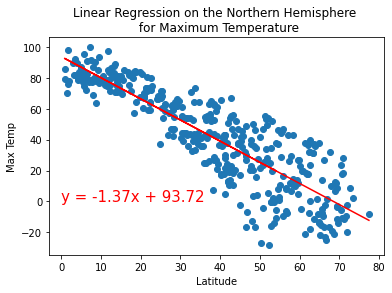

The correlation is -0.8712186628329781


In [79]:
# linear regression on the northern hemisphere 
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Max Temp']

# Call the function 
plot_linear_regression(x_values, y_values,
                      'Linear Regression on the Northern Hemisphere \n for Maximum Temperature', 'Max Temp',(0,0))

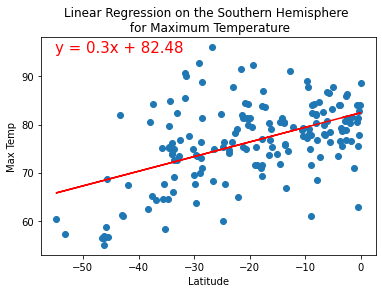

The correlation is 0.4989481239100089


In [78]:
# Generate the max temp plot for the S hemi
# linear regression on the S hemisphere 
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Max Temp']

# Call the function 
plot_linear_regression(x_values, y_values,
                      'Linear Regression on the Southern Hemisphere \n for Maximum Temperature', 'Max Temp',(-55,95))

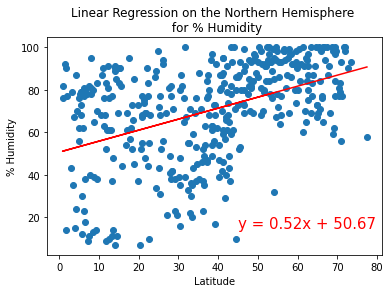

The correlation is 0.4415398069132882


In [84]:
# linear regression on the northern hemisphere humidity
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Humidity']

# Call the function 
plot_linear_regression(x_values, y_values,
                      'Linear Regression on the Northern Hemisphere \n for % Humidity', '% Humidity',(45,15))

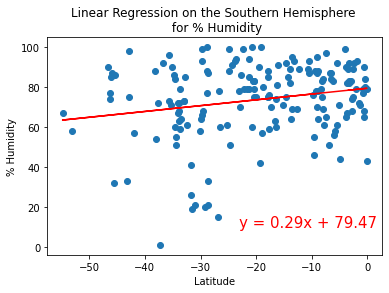

The correlation is 0.21118384289030526


In [91]:
# linear regression on the S hemisphere humidity
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Humidity']

# Call the function 
plot_linear_regression(x_values, y_values,
                      'Linear Regression on the Southern Hemisphere \n for % Humidity', '% Humidity',(-23,10))

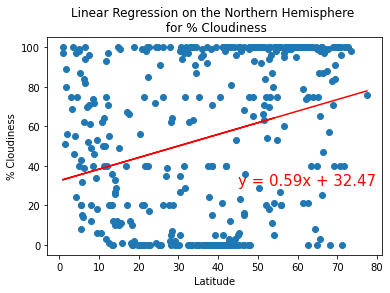

The correlation is 0.28890428658633666


In [98]:
# linear regression on the N hemisphere % cloudiness
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Cloudiness']

# Call the function 
plot_linear_regression(x_values, y_values,
                      'Linear Regression on the Northern Hemisphere \n for % Cloudiness', '% Cloudiness',(45,30))

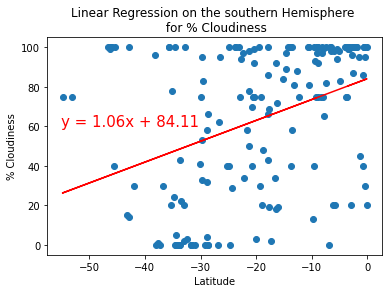

The correlation is 0.3762231063830364


In [102]:
# linear regression on the S hemisphere % cloudiness
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Cloudiness']

# Call the function 
plot_linear_regression(x_values, y_values,
                      'Linear Regression on the southern Hemisphere \n for % Cloudiness', '% Cloudiness',(-55,60))

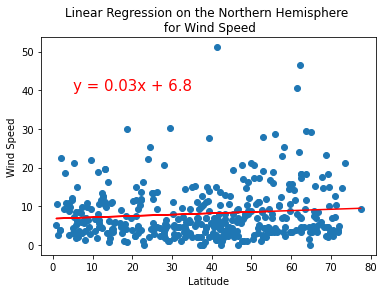

The correlation is 0.10016175271104856


In [104]:
# linear regression on the N hemisphere wind speed
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Wind Speed']

# Call the function 
plot_linear_regression(x_values, y_values,
                      'Linear Regression on the Northern Hemisphere \n for Wind Speed', 'Wind Speed',(5,40))

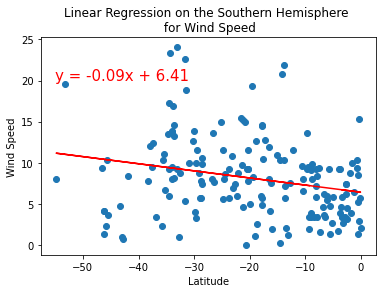

The correlation is -0.24254352714878943


In [107]:
# linear regression on the S hemisphere wind speed
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Wind Speed']

# Call the function 
plot_linear_regression(x_values, y_values,
                      'Linear Regression on the Southern Hemisphere \n for Wind Speed', 'Wind Speed',(-55,20))